# Lending Club- Risk Analysis 
## Here we have to analyse how many costumer who applied for loan are going to default.

## 1. Reading, understanding, handling null values, cleaning data, removing outliers
## Making data ready for analysis in the best possible way

In [148]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

loan = pd.read_csv(r"F:\upgrad\LENDING CLUB CASE STUDY\loan.csv",low_memory=False)

In [2]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
loan.shape

(39717, 111)

### There are  around 40000 rows 111 columns in the given data. It will not be possible to look at each and every column in detail. 
#### Let's see some rows and use data index file to understand all columns first. Then based on that understanding, we will have to decide how to go forward (say which columns will be important etc.)

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
loan.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Observed that there are lot of null values in various columns and many columns had both values null in above 2 records. First we need to clean the data.

### Below columns could be important in our analysis :
loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti

### Let's clean null values first


In [7]:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### Let's find %ge of null values in each column for better understanding.

In [8]:
round(loan.isnull().sum()/len(loan), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


### Some columns clearly have all values null. These have to be dropped. Imputting such large data is not advisable. Lets drop such columns first

In [9]:
len(loan)

39717

In [10]:
null_col=list(loan.columns[loan.isnull().sum()==len(loan)])
print(null_col)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

In [11]:
loan = loan.drop(null_col, axis=1)

In [12]:
loan.shape

(39717, 57)

In [13]:
round(loan.isnull().sum()/len(loan), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

### Now we are left with 57 columns. Still, there are 7 columns with 97%, 93%, 65%, 33%, 6%, 3% & 2% null values. 
### Except for pub_rec_bankruptcies & emp_title & emp_length - all other columns have signifiacant null data which can dropped since these many values can't be predicted and imputted.

In [14]:
remove = ['mths_since_last_delinq','mths_since_last_record','desc','next_pymnt_d']
print(remove)

['mths_since_last_delinq', 'mths_since_last_record', 'desc', 'next_pymnt_d']


In [15]:
loan = loan.drop(remove,axis=1)

In [16]:
loan.shape

(39717, 53)

### now there are very few columns with null values & there too, null value fraction is very small.
#### Checking data again

In [17]:
loan.head(50)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,f,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,f,0.00,0.00,646.020000,646.02,162.02

### observed that some of the columns such as Policy_Code, Application_Type etc have same value in all 50 rows. If a column has only one unique value. It can be safely dropped

In [18]:
unique_list = loan.nunique()
unique_cols = unique_list[unique_list.values==1]

In [19]:
unique_cols

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [20]:
loan.drop(labels = list(unique_cols.index), axis =1, inplace=True)

In [21]:
loan.shape

(39717, 44)

In [22]:
round(loan.isnull().sum()/len(loan), 2)*100

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  6.0
emp_length                 3.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
url                        0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prnc

In [23]:
print(loan.emp_title.isnull().sum())
print(loan.emp_length.isnull().sum())


2459
1075


In [24]:
loan.emp_length.unique()


array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [25]:
loan[(loan['emp_title'].notnull()) & (loan['emp_length'].isnull())].shape

(56, 44)

### emp_title & emp_length have different %ge of null values. For our analysis, emp_length (working experience) is better categorical variable
#### Where emp_length is null needs to be treated. 
#### If emp_title & emp_length both are null --> could be safely assumed to be self-employed.
#### if emp_title is not provided --> could be ignored as long as length is availble
#### However, where length is null but emp_title is provided --> experience can't be imputed here. Also, such records are only 56 i.w. very less which could be safely dropped.

In [26]:
emp_remove = list(loan[(loan['emp_title'].notnull()) & (loan['emp_length'].isnull())].id)
print(emp_remove)

[1043970, 1044374, 1017720, 1031425, 1018084, 1016062, 1014001, 1007423, 997611, 991819, 977338, 965882, 949960, 878215, 863300, 857384, 836201, 813815, 812172, 798731, 783521, 747113, 727973, 674149, 707798, 680190, 655993, 661665, 646833, 651345, 638887, 623284, 614648, 607566, 605133, 591771, 585734, 563362, 578968, 570024, 565567, 557103, 549295, 441547, 523855, 475830, 515525, 465659, 477027, 499418, 496856, 495882, 465736, 490109, 472179, 479836]


In [27]:
loan = loan[~loan['id'].isin(emp_remove)]

In [28]:
loan.emp_length.mode()#checking out mode

0    10+ years
dtype: object

In [29]:
#### Let's now fill remaining na values of emp_length with its mode10year.

In [30]:
loan.emp_length.fillna('10 year',inplace=True)

### Further dropping certain columns which will be insignificant considering our purpose to identify indicators of default

In [31]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [32]:
# 2.5 Dropping insignificant columnsa
loan.drop(labels = ['url','zip_code','total_rec_prncp','total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                    'last_pymnt_amnt','last_pymnt_d'],axis = 1, inplace = True)

In [33]:
loan.shape

(39661, 35)

In [34]:
loan.drop(labels = ['id','member_id','delinq_2yrs','earliest_cr_line','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv'],axis=1,inplace=True)

In [35]:
loan.shape

(39661, 21)

In [36]:
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
last_credit_pull_d       object
pub_rec_bankruptcies    float64
dtype: object

In [37]:
loan['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     783
7.88%     723
7.49%     655
11.71%    607
9.99%     602
7.90%     581
5.42%     571
11.99%    530
12.69%    490
10.37%    467
6.03%     446
12.99%    446
8.49%     445
12.42%    442
10.65%    434
5.79%     410
8.90%     401
7.29%     396
6.62%     395
11.86%    390
14.27%    389
10.59%    380
9.63%     376
9.91%     375
5.99%     347
7.14%     340
6.99%     336
11.11%    331
12.53%    327
16.77%    327
10.74%    312
6.54%     305
6.91%     303
8.94%     294
7.66%     292
13.61%    290
15.99%    285
13.98%    283
13.23%    263
11.12%    256
13.99%    256
6.17%     252
12.68%    251
10.36%    250
10.00%    249
10.75%    249
11.36%    247
16.49%    241
11.83%    233
18.25%    230
10.62%    228
14.65%    221
13.06%    220
10.38%    219
10.25%    218
15.23%    214
14.96%    213
16.89%    209
15.65%    208
11.14%    206
6.92%     204
12.18%    203
17.27%    202
15.27%    199
15.95%    199
16.32%    198
14.79%    192
8.00%     191
17.49%

### Lets convert the interest rate column data type to numeric by removing "%sign"

In [38]:
loan['int_rate'] = loan['int_rate'].apply(lambda x : x.replace("%",""))

In [39]:
loan['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     783
7.88     723
7.49     655
11.71    607
9.99     602
7.90     581
5.42     571
11.99    530
12.69    490
10.37    467
6.03     446
12.99    446
8.49     445
12.42    442
10.65    434
5.79     410
8.90     401
7.29     396
6.62     395
11.86    390
14.27    389
10.59    380
9.63     376
9.91     375
5.99     347
7.14     340
6.99     336
11.11    331
16.77    327
12.53    327
10.74    312
6.54     305
6.91     303
8.94     294
7.66     292
13.61    290
15.99    285
13.98    283
13.23    263
11.12    256
13.99    256
6.17     252
12.68    251
10.36    250
10.00    249
10.75    249
11.36    247
16.49    241
11.83    233
18.25    230
10.62    228
14.65    221
13.06    220
10.38    219
10.25    218
15.23    214
14.96    213
16.89    209
15.65    208
11.14    206
6.92     204
12.18    203
17.27    202
15.95    199
15.27    199
16.32    198
14.79    192
8.00     191
17.49    190
15.21    186
12.73    185
15.58    185
9.62     184
9.32     184

#### Ensuring all continuous variables have integers data type. So co-relation can be found during further analysis

In [40]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [41]:
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
last_credit_pull_d       object
pub_rec_bankruptcies    float64
dtype: object

In [42]:
loan.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,last_credit_pull_d,pub_rec_bankruptcies
39712,2500,2500,1075.0,36 months,8.07,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,CO,11.33,Jun-10,NaN
39713,8500,8500,875.0,36 months,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,NC,6.40,Jul-10,NaN
39714,5000,5000,1325.0,36 months,8.07,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,MA,2.30,Jun-07,NaN
39715,5000,5000,650.0,36 months,7.43,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,MD,3.72,Jun-07,NaN
39716,7500,7500,800.0,36 months,13.75,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,debt_consolidation,Consolidation Loan,MA,14.29,Jun-10,NaN


In [43]:
loan['home_ownership'].value_counts()

RENT        18871
MORTGAGE    17641
OWN          3048
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

#### 3 none records can be safely dropped

In [44]:
loan = loan[loan.home_ownership != 'NONE']

In [45]:
loan.shape

(39658, 21)

In [46]:
loan.purpose.describe()

count                  39658
unique                    14
top       debt_consolidation
freq                   18619
Name: purpose, dtype: object

### Loan Status --> This is our target variable. Let's see how many unique status data has
### There are only 3 unique status. No further cleansing seems to be needed

In [47]:
(loan.loan_status.value_counts()*100)/len(loan)

Fully Paid     82.969388
Charged Off    14.158556
Current         2.872056
Name: loan_status, dtype: float64

### Purpose is to check for trends or indicators of default in loans. This analysis should consider average customer segment. 
### Let's take Customer Income and check for if there are any outliers present in the data which could caffect our analysis.

In [48]:
loan.annual_inc.describe() # We can see there is huge difference in '75%' and 'max ' therefore there are outliers.

count    3.965800e+04
mean     6.900197e+04
std      6.382572e+04
min      4.000000e+03
25%      4.050000e+04
50%      5.900000e+04
75%      8.240000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [49]:
pd.options.display.float_format = '{:.4f}'.format

In [50]:
loan.annual_inc.describe()

count     39658.0000
mean      69001.9748
std       63825.7171
min        4000.0000
25%       40500.0000
50%       59000.0000
75%       82400.0000
max     6000000.0000
Name: annual_inc, dtype: float64

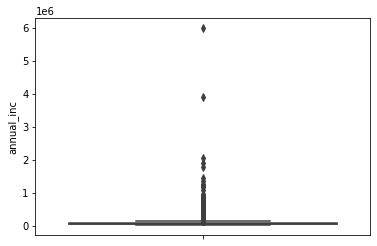

In [51]:
sns.boxplot(y = 'annual_inc', data = loan)

####     The above graph shows that there is a high amount outlier present. Maximum value is 87 times higher than Mean 
####    and 102 times high than Median. Let's drop these outliers beyond a certain quantile value

In [52]:
loan.annual_inc.quantile(0.99)

235000.0

#### As we can see 99th quantile is also very small considering maximum value of 60,00,000/- Let's drop beyond 99th quantile

In [53]:
qnt = loan.annual_inc.quantile(0.99)
loan = loan[loan.annual_inc < qnt]

In [54]:
loan.annual_inc.describe()

count    39260.0000
mean     65552.4225
std      35217.0092
min       4000.0000
25%      40000.0000
50%      58000.0000
75%      81000.0000
max     234996.0000
Name: annual_inc, dtype: float64

In [55]:
loan.shape

(39260, 21)

#### Purpose of loan : 

In [56]:
(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation   47.0581
credit_card          12.9470
other                10.0382
home_improvement      7.3688
major_purchase        5.5120
small_business        4.5644
car                   3.9226
wedding               2.3841
medical               1.7448
moving                1.4646
vacation              0.9705
house                 0.9450
educational           0.8227
renewable_energy      0.2573
Name: purpose, dtype: float64

### Loan Status --> Converting into a numeric column by assigning values across all loan statuses
### But before that, we will drop rows with loan status = Current. We can't  find any default indicators in the loans which are curently running. 

In [57]:
loan = loan[loan['loan_status']!='Current']

In [58]:
loan['num_loan_status'] = loan['loan_status'].apply(lambda x : 1 if x=="Fully Paid" else 0)#New target variable

In [59]:
loan['num_loan_status'].value_counts()

1    32563
0     5572
Name: num_loan_status, dtype: int64

## 2. Derving certain metric (columns) from existing data based on our understanding which could be helpful for data analysis

 #### Extract Year & Month from Issue date

In [60]:
loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str
a=loan[['issue_d','issue_month','issue_year']]

## 3. Univariate Analysis
### Continuous Variables
In case of continuous variables, we need to understand the central tendency and spread of the variable using various statistical metrics & visualization such as Boxplot,Histogram/Distribution Plot

### Categorical Variables
For categorical variables, we’ll use frequency table to understand distribution of each category. It can be be measured using two metrics, Count and Count% against each category. Countplot or Bar chart can be used as visualization.

In [61]:
#Plotting the"issue_month"with the target valriable "num_loan _status"

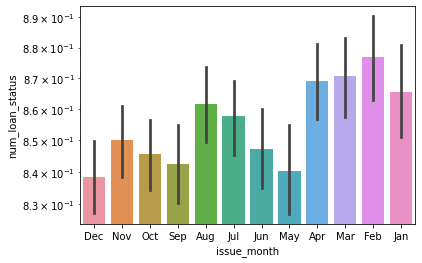

In [62]:
import matplotlib.pyplot as plt
sns.barplot(x=loan["issue_month"],y="num_loan_status",data=loan)
plt.yscale('log')
plt.show()

In [63]:
#Plotting "issue_year" with "num_loan_status" that is target variable

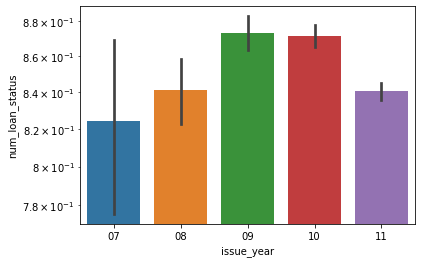

In [64]:
sns.barplot(x=loan["issue_year"],y="num_loan_status",data=loan)
plt.yscale('log')
plt.show()

Distribution of loan amount 

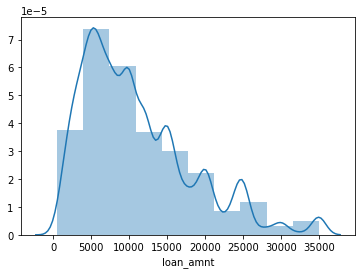

In [65]:
sns.distplot(loan.loan_amnt,bins=10)


From distribution plot we can see most of the loan_amount are distributted between 5000 to 7500

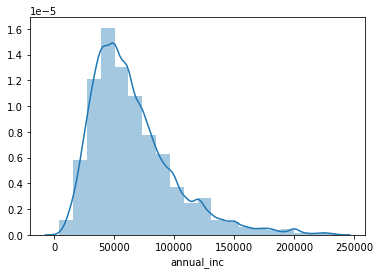

In [66]:
sns.distplot(loan.annual_inc,bins=20)

Here we can see that most of the loan accepted have annual_income around 50000.

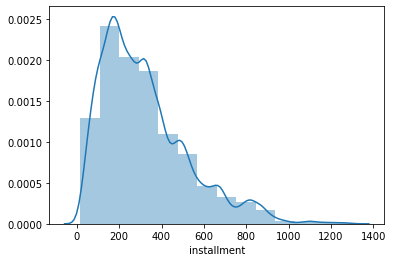

In [67]:
sns.distplot(loan.installment,bins=14)

We can see monthly payement owed by the borrower is mostly around 200 .

In [68]:
loan[loan.loan_amnt != loan.funded_amnt].loan_amnt.count()

1726

There are 1726 observations where loan_amnt != funded_amnt. So, for Data Analysis the main amount variable that needs to be considered is loan_amnt as that is the amount applied for by the borrower.

Also, in the data dictionary it is mentioned that "If at some point in time, the credit department reduces the loan amount, then it will be reflected in this loan_amnt field".

#### Categorical Variables :
  #### Unordered :
    1. loan_status
    2. home_ownership
    3. purpose
    4. addr_state

Fully Paid     32563
Charged Off     5572
Name: loan_status, dtype: int64


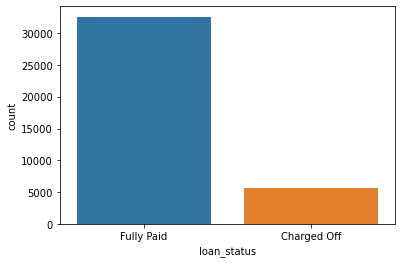

In [69]:
series = loan.loan_status.value_counts()
print(series)
sns.countplot(x=loan["loan_status"],data=loan)

Most loans are fully repaid.Around 14-15% are getting charged off which is still significant.

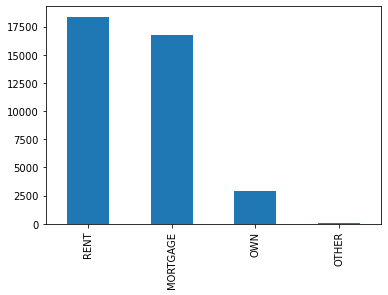

In [70]:
loan.home_ownership.value_counts().plot(kind="bar")

Most loan applicants have home ownership status as Rented followed by Mortgaged

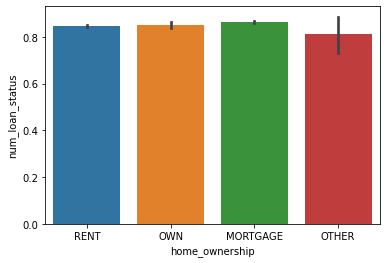

In [71]:
sns.barplot(x='home_ownership',y="num_loan_status",data=loan)

Most of the 'Charged Off' borrower  are under "OTHER".

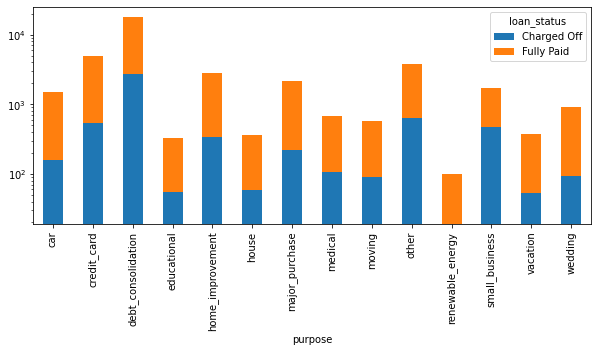

In [72]:
loan1 = loan[['loan_status','purpose']]
loan1=loan1.pivot_table(index = ['purpose'],columns=['loan_status'],aggfunc='size')
loan1.plot(kind="bar",stacked="True",figsize=[10,4])
plt.yscale("log")

In the purpose of loan we can see that debt_consolidation,credit_card,small_business and home_improvement are more prone to default.

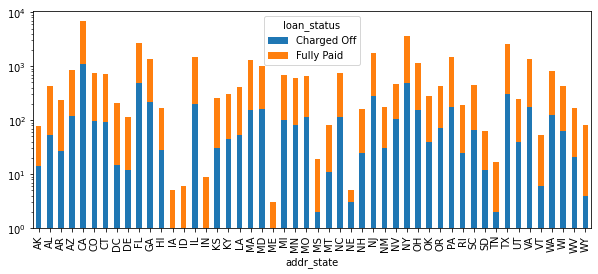

In [73]:
loan2 = loan[['loan_status','addr_state']]
loan2=loan2.pivot_table(index = ['addr_state'],columns=['loan_status'],aggfunc='size')
loan2.plot(kind="bar",stacked="True",figsize=[10,4])
plt.yscale("log")


Maximum loan applications are from CA state followed by NY ,FL and TX also more vulnerable to default.

   #### Ordered Categorical Variables :

        1. term
        2. grade
        3. sub_grade
        4. emp_length
        5. issue_year


In [74]:
print(loan.groupby(by = 'loan_status').term.value_counts())

loan_status  term      
Charged Off   36 months     3191
              60 months     2381
Fully Paid    36 months    25581
              60 months     6982
Name: term, dtype: int64


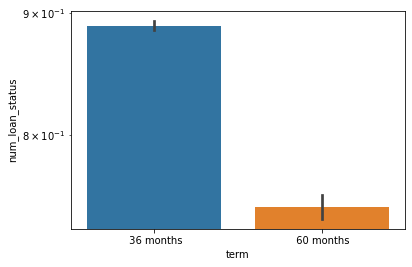

In [75]:
sns.barplot(x='term',y="num_loan_status", data=loan)
plt.yscale('log')
plt.show()

From graph we see most of the approved loans are for short term that is 36 months.
Also 60 months have more chances of default.

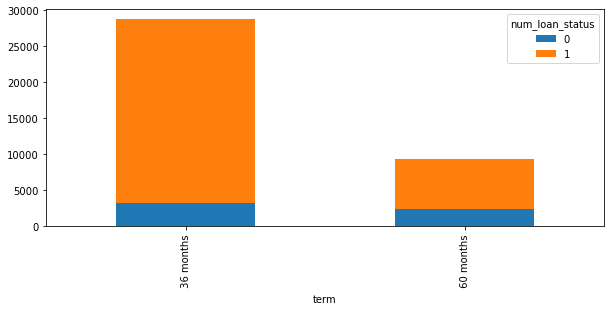

In [76]:
loan3 = loan[['num_loan_status','term']]
loan3=loan3.pivot_table(index = ['term'],columns=['num_loan_status'],aggfunc='size')
loan3.plot(kind="bar",stacked="True",figsize=[10,4])
#plt.yscale("log")

### Most of the loan applicants apply for 36 months Loan Term.

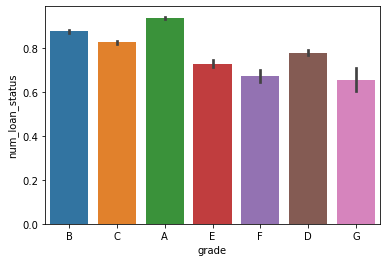

In [77]:

sns.barplot(x='grade',y='num_loan_status',data=loan)

### Most loan applications are internally categorized by Lending Club in Grade B followed by A & then C

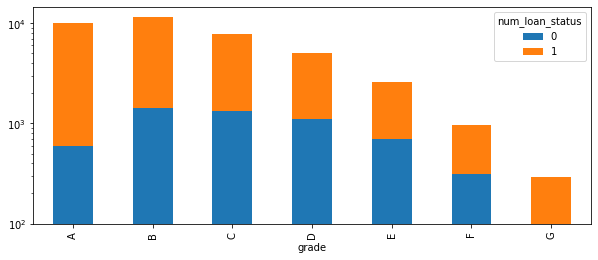

In [78]:
loan4 = loan[['num_loan_status','grade']]
loan4=loan4.pivot_table(index = ['grade'],columns=['num_loan_status'],aggfunc='size')
loan4.plot(kind="bar",stacked="True",figsize=[10,4])
plt.yscale("log")

We can clearly see that grade B is more prone to charge off than grade C than grade D.

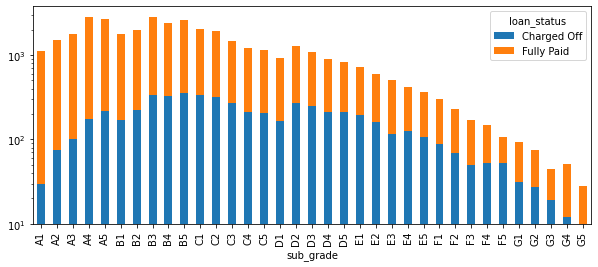

In [79]:
loan5 = loan[['loan_status','sub_grade']]
loan5=loan5.pivot_table(index = ['sub_grade'],columns=['loan_status'],aggfunc='size')
loan5.plot(kind="bar",stacked="True",figsize=[10,4])
plt.yscale("log")


Trend is same but most analysis need to figure out more risky sub grade

### Most loan applications are internally classified by Lending Club in Sub-Grade B3 followed by A4 & then A5

In [80]:
loan.emp_length.replace('< 1 year', '1 year', inplace = True)

loan.emp_length.replace('10+ years', '10 years', inplace = True)

loan['emp_length'] = loan['emp_length'].apply(lambda x : x.replace("years",""))
loan['emp_length'] = loan['emp_length'].apply(lambda x : x.replace("year",""))

loan['emp_length'] = loan['emp_length'].apply(pd.to_numeric)

series = loan.emp_length.value_counts()

In [81]:
print(loan.groupby(by = 'loan_status').emp_length.value_counts())

loan_status  emp_length
Charged Off  10            1531
             1             1090
             2              561
             3              551
             4              456
             5              456
             6              305
             7              262
             8              203
             9              157
Fully Paid   10            7796
             1             6531
             2             3684
             3             3426
             4             2860
             5             2711
             6             1846
             7             1435
             8             1216
             9             1058
Name: emp_length, dtype: int64


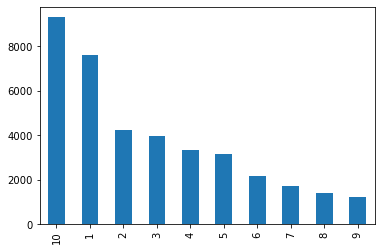

In [82]:
loan.emp_length.value_counts().plot(kind="bar")

### Most loan applications are received from customers who have 10 year or plus employment experience

In [83]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'num_loan_status',
       'issue_month', 'issue_year'],
      dtype='object')

In [84]:
print(loan.groupby(by = 'loan_status').issue_year.value_counts())

loan_status  issue_year
Charged Off  11             3234
             10             1459
             09              590
             08              246
             07               43
Fully Paid   11            17055
             10             9928
             09             4073
             08             1305
             07              202
Name: issue_year, dtype: int64


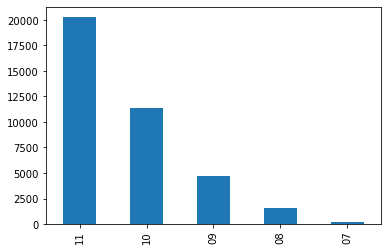

In [85]:
loan.issue_year.value_counts().plot(kind="bar")

### Loans distribution is going year on year basis. Highest loan applications are noted in 2011

#####          Univariate Analysis: Quantitative Variables

    Quantitative or Continuous Variables are:

        1. funded_amnt
        2. int_rate_percent
        3. installment
        4. annual_inc
        5. dti

In [86]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'num_loan_status',
       'issue_month', 'issue_year'],
      dtype='object')

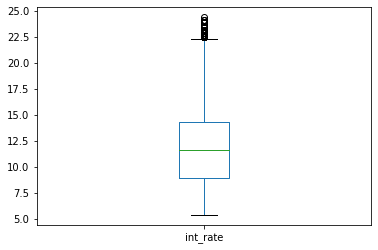

In [87]:
loan.int_rate.plot.box()

In [88]:
loan.int_rate.describe()

count   38135.0000
mean       11.9195
std         3.6845
min         5.4200
25%         8.9400
50%        11.7100
75%        14.3500
max        24.4000
Name: int_rate, dtype: float64

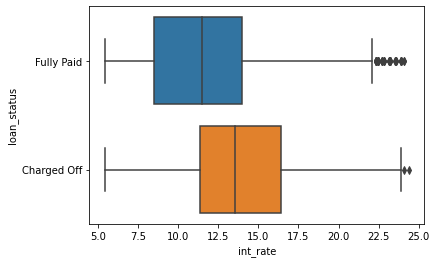

In [89]:
sns.boxplot(x="int_rate",y="loan_status",data=loan)

#### Interest rates are distributed between 9% to 16%
#### Whereas, Int rates for charged off loans are distributed between around 11% to 16%. Higher int rate loans seem to have more tendency to be charged off

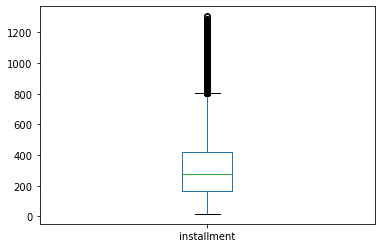

In [90]:
loan.installment.plot.box()

In [91]:
loan.installment.describe()

count   38135.0000
mean      320.0815
std       205.9545
min        15.6900
25%       165.4150
50%       276.4800
75%       421.8600
max      1305.1900
Name: installment, dtype: float64

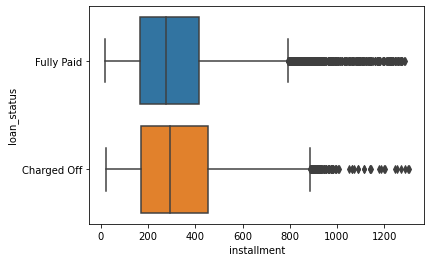

In [92]:
sns.boxplot(x="installment",y="loan_status",data=loan)

#### Most installments on various loans are distributed between 150-450
#### Similarly, most installments of charged off loans are also distributed between 150-450

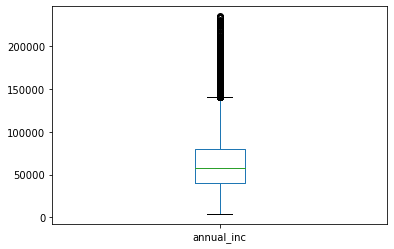

In [93]:
loan.annual_inc.plot.box()

In [94]:
loan.annual_inc.describe()

count    38135.0000
mean     65350.9413
std      35172.0764
min       4000.0000
25%      40000.0000
50%      58000.0000
75%      80324.4000
max     234996.0000
Name: annual_inc, dtype: float64

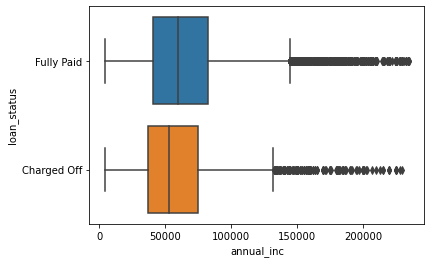

In [95]:
sns.boxplot(x="annual_inc",y="loan_status",data=loan)

In [96]:
loan[loan['loan_status'] ==  "Charged Off"].annual_inc.describe()

count     5572.0000
mean     59889.0858
std      32844.8562
min       4080.0000
25%      37000.0000
50%      52983.9800
75%      75000.0000
max     230000.0000
Name: annual_inc, dtype: float64

#### As can be seen - overall annual income of customers is distributed between 40000-81000 & annual income of customers whose loans are charged off is also distributed between 37000-75000

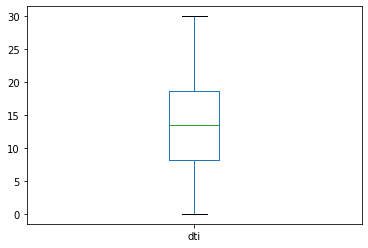

In [97]:
loan.dti.plot.box()

In [98]:
loan.dti.describe()

count   38135.0000
mean       13.3354
std         6.6565
min         0.0000
25%         8.2150
50%        13.4300
75%        18.6000
max        29.9900
Name: dti, dtype: float64

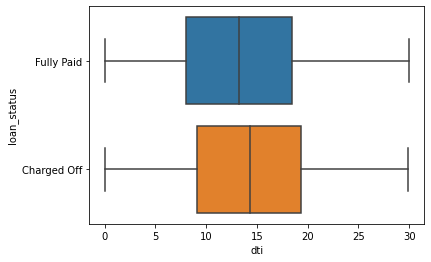

In [99]:
sns.boxplot(x="dti",y="loan_status",data=loan)

In [100]:
loan[loan['loan_status'] ==  "Charged Off"].dti.describe()

count   5572.0000
mean      14.0411
std        6.5673
min        0.0000
25%        9.1275
50%       14.3300
75%       19.3000
max       29.8500
Name: dti, dtype: float64

#### As can be seen - dti ratio (debt to income) of customers is overall distributed between 8-18 & dti of customers whose loans are charged off is also distributed between 9-19

## 4. Bi-variate Analysis

##### Earlier during univariate analysis only - we had seen that most chagred off loan applicants were observed in rented &/or mortgaged homes.
##### Let's get a more clear picture by finding out ratio of charged off application for each category of Home Ownership

### a. Home Ownership :

In [101]:
loan5 = loan.pivot_table(values = 'loan_amnt',
                      index = 'home_ownership',
                      columns = 'loan_status',
                      aggfunc = 'count',
                      fill_value = 0,   
                      margins = True,
                      margins_name = 'Total')

loan5['Charged Off Rate'] = 100*(round((loan5['Charged Off']/loan5['Total']), 6))

In [102]:
loan5

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
home_ownership,,,,
MORTGAGE,2300,14432,16732,13.7461
OTHER,18,78,96,18.7500
OWN,438,2500,2938,14.9081
RENT,2816,15553,18369,15.3302
Total,5572,32563,38135,14.6112


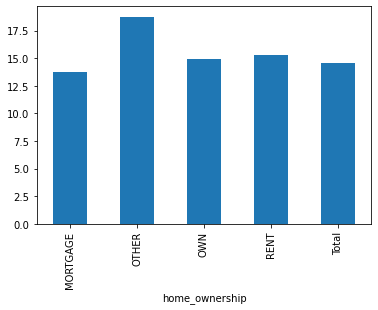

In [103]:
loan5['Charged Off Rate'].plot(kind="bar")


In [104]:
### Most no. of charged off loan applications have home ownership status : rented &/or mortgaged 
### Home ownership status with high Charged Off rate are : Others, Rented & Own respectively

### b. Loan Purpose & Loan Charged Off Rate

In [105]:
loan6= loan[['loan_status','purpose']]

In [106]:
loan6= loan.pivot_table(values = 'loan_amnt',
                      index = 'purpose',
                      columns = 'loan_status',
                      aggfunc = 'count',
                      fill_value = 0,   
                      margins = True,
                      margins_name = 'Total')


loan6['Charged Off Rate'] = 100*(round((loan6['Charged Off']/loan6['Total']), 6))

In [107]:
loan6

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
purpose,,,,
car,159,1331,1490,10.6711
credit_card,536,4445,4981,10.7609
debt_consolidation,2749,15147,17896,15.3610
educational,55,268,323,17.0279
home_improvement,338,2458,2796,12.0887
house,58,299,357,16.2465
major_purchase,220,1907,2127,10.3432
medical,106,567,673,15.7504
moving,90,478,568,15.8451


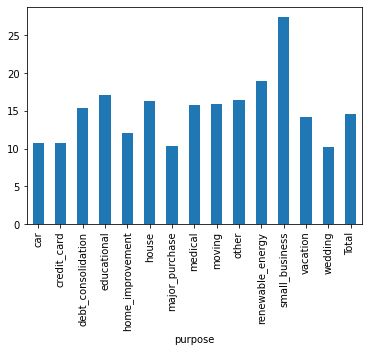

In [108]:
loan6['Charged Off Rate'].plot(kind="bar")


### c. Address State & Loan Charged Off Rate

In [109]:
loan7 = loan[['loan_status','addr_state']]

#loan1=loan1.pivot_table(index = ['addr_state'],columns=['loan_status'],aggfunc='size')



In [110]:
loan7= loan.pivot_table(values = 'loan_amnt',
                      index = 'addr_state',
                      columns = 'loan_status',
                      aggfunc = 'count',
                      fill_value = 0,   
                      margins = True,
                      margins_name = 'Total')


loan7['Charged Off Rate'] = 100*(round((loan7['Charged Off']/loan7['Total']), 6))

In [111]:
loan7

loan_status,Charged Off,Fully Paid,Total,Charged Off Rate
addr_state,,,,
AK,14,63,77,18.1818
AL,54,376,430,12.5581
AR,27,208,235,11.4894
AZ,121,715,836,14.4737
CA,1113,5756,6869,16.2032
CO,97,659,756,12.8307
CT,94,618,712,13.2022
DC,15,196,211,7.1090
DE,12,101,113,10.6195


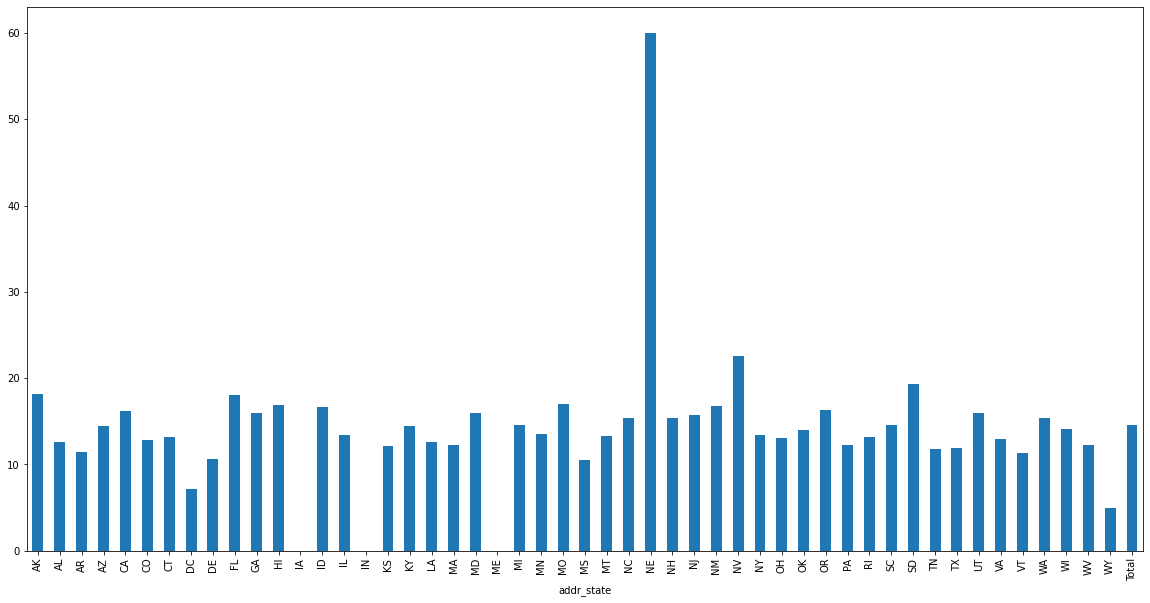

In [112]:
loan7['Charged Off Rate'].plot(kind="bar",figsize=[20,10])


 Address State with high Charged off Rate is: NE


### d. Loan Term & Loan Charged Off Rate

In [113]:
loan8 = loan.pivot_table(values = 'loan_amnt',
                      index = 'term',
                      columns = 'loan_status',
                      aggfunc = 'count',
                      fill_value = 0,   
                      margins = True,
                      margins_name = 'Total')


loan8['Charged Off Rate'] = 100*(round((loan8['Charged Off']/loan8['Total']), 6))

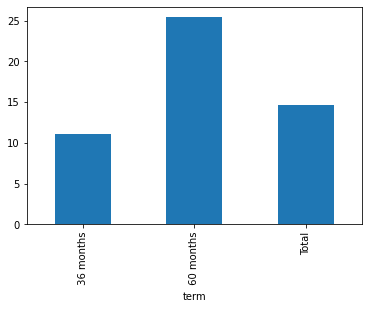

In [114]:
loan8['Charged Off Rate'].plot(kind="bar")


### Most no. of charged off loan applications have Term : 36 months
### Term with high Loan Charged off Rate is: 60 months

### e. Loan Grade & Loan Charged Off Rate

In [115]:
loan9 = loan.pivot_table(values = 'loan_amnt',
                      index = 'grade',
                      columns = 'loan_status',
                      aggfunc = 'count',
                      fill_value = 0,   
                      margins = True,
                      margins_name = 'Total')


loan9['Charged Off Rate'] = 100*(round((loan9['Charged Off']/loan9['Total']), 6))



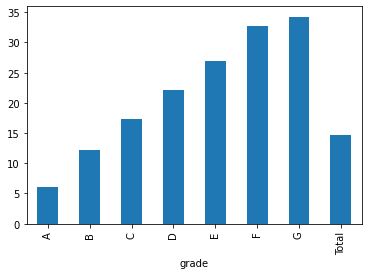

In [116]:
loan9['Charged Off Rate'].plot(kind="bar")

### Most no. of charged off loan applications have Grade : B followed by C & then D
### Grade with high Loan Charged off Rate is: G
### Loan Charged Off rate goes on increasing as we move from Grade A to Grade G

### f. Loan Sub-Grade & Loan Charged Off Rate

In [117]:
loan10 = loan.pivot_table(values = 'loan_amnt',
                      index = 'sub_grade',
                      columns = 'loan_status',
                      aggfunc = 'count',
                      fill_value = 0,   
                      margins = True,
                      margins_name = 'Total')


loan10['Charged Off Rate'] = 100*(round((loan10['Charged Off']/loan10['Total']), 6))

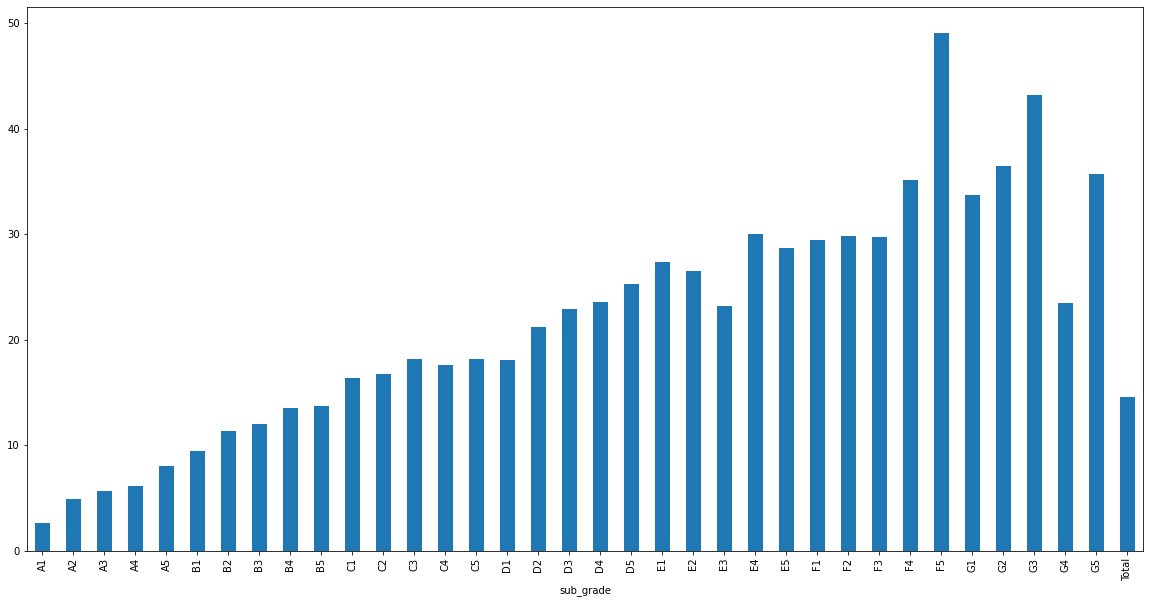

In [118]:
loan10['Charged Off Rate'].plot(kind="bar",figsize=[20,10])


### Previously we have seen that as we move from Grade A to G --> no. of charged off loans goes on increasing.
### Sub-Grades F5 followed by G3 & then by G2 haveTop 3 highest Charged Off Rate.

### g. Employment Experience of loan seekers & Loan Charged Off Rate

In [119]:
loan11 = loan.pivot_table(values = 'loan_amnt',
                      index = 'emp_length',
                      columns = 'loan_status',
                      aggfunc = 'count',
                      fill_value = 0,   
                      margins = True,
                      margins_name = 'Total')


loan11['Charged Off Rate'] = 100*(round((loan11['Charged Off']/loan11['Total']), 6))

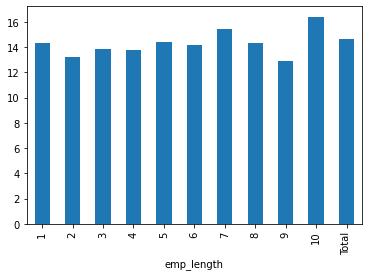

In [120]:
loan11['Charged Off Rate'].plot(kind="bar")


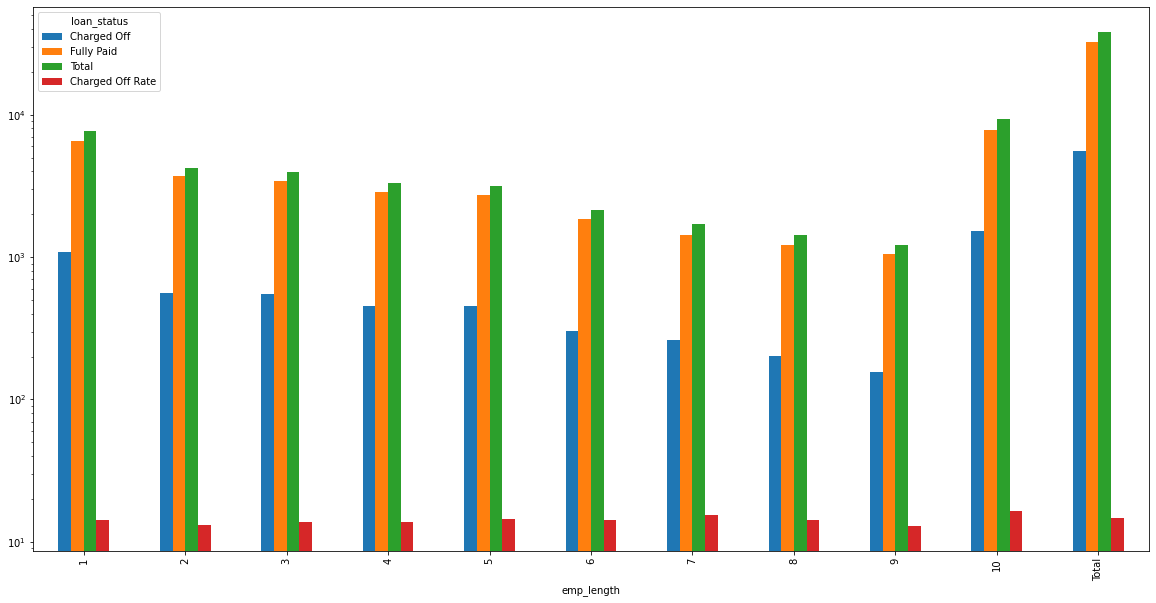

In [121]:
loan11.plot(kind="bar",figsize=[20,10])
plt.yscale('log')

### Customers having no employment experience have highest loan charged off rate
### Even though, based on total no. - customers with 10 year plus exprience have most charged off loans

### h. Issue Year of Loan & Loan Charged Off Rate

In [122]:
loan11 = loan.pivot_table(values = 'loan_amnt',
                      index = 'issue_year',
                      columns = 'loan_status',
                      aggfunc = 'count',
                      fill_value = 0,   
                      margins = True,
                      margins_name = 'Total')


loan11['Charged Off Rate'] = 100*(round((loan11['Charged Off']/loan11['Total']), 6))

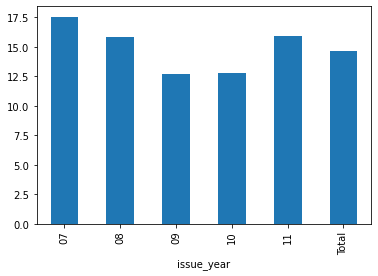

In [123]:
loan11['Charged Off Rate'].plot(kind="bar")


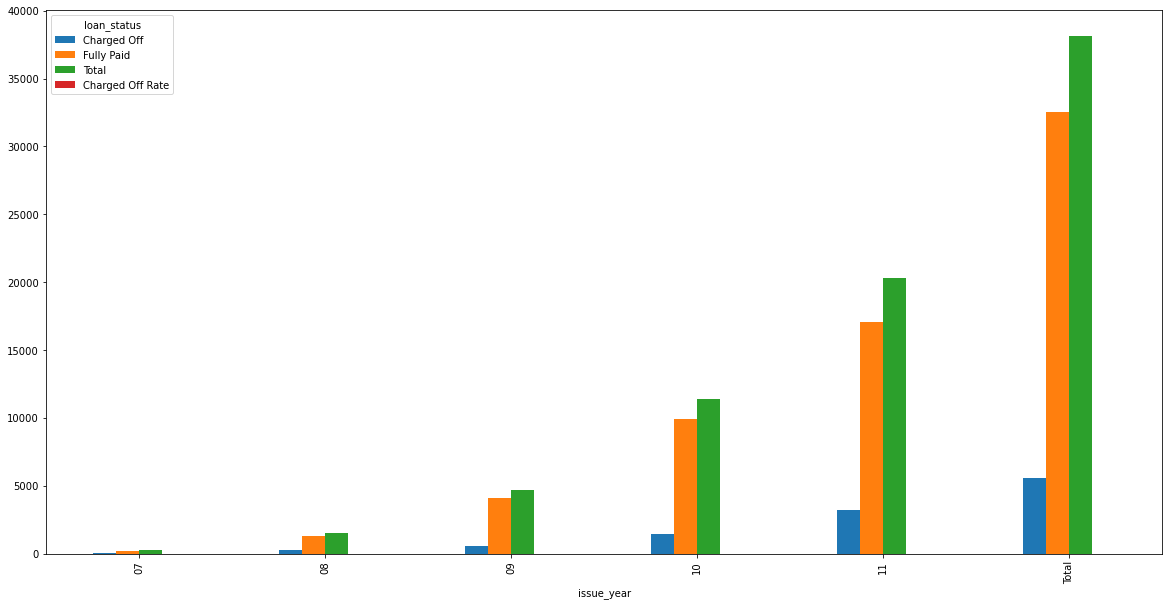

In [124]:
loan11.plot(kind="bar",figsize=[20,10])

### The loan Charged Off rate was dropping continuously since 2007 up to 2010. (highest being in 2007). However, in 2011 again the same is increased which is a concern
### However, since the volume of loans is increasing year by year --> highest no. of charged off loans are in 2011

### i. Loan Amount

In [125]:
loan.loan_amnt.max()#checking maximum limit for bins

35000

In [126]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

In [127]:
loan12 = loan.pivot_table(values = 'loan_amnt',
                      index = 'loan_amnt_range',
                      columns = 'loan_status',
                      aggfunc = 'count',
                      fill_value = 0,   
                      margins = True,
                      margins_name = 'Total')


loan12['Charged Off Rate'] = 100*(round((loan12['Charged Off']/loan12['Total']), 6))

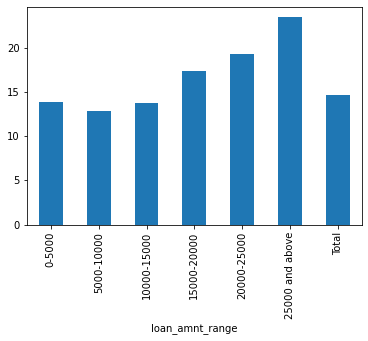

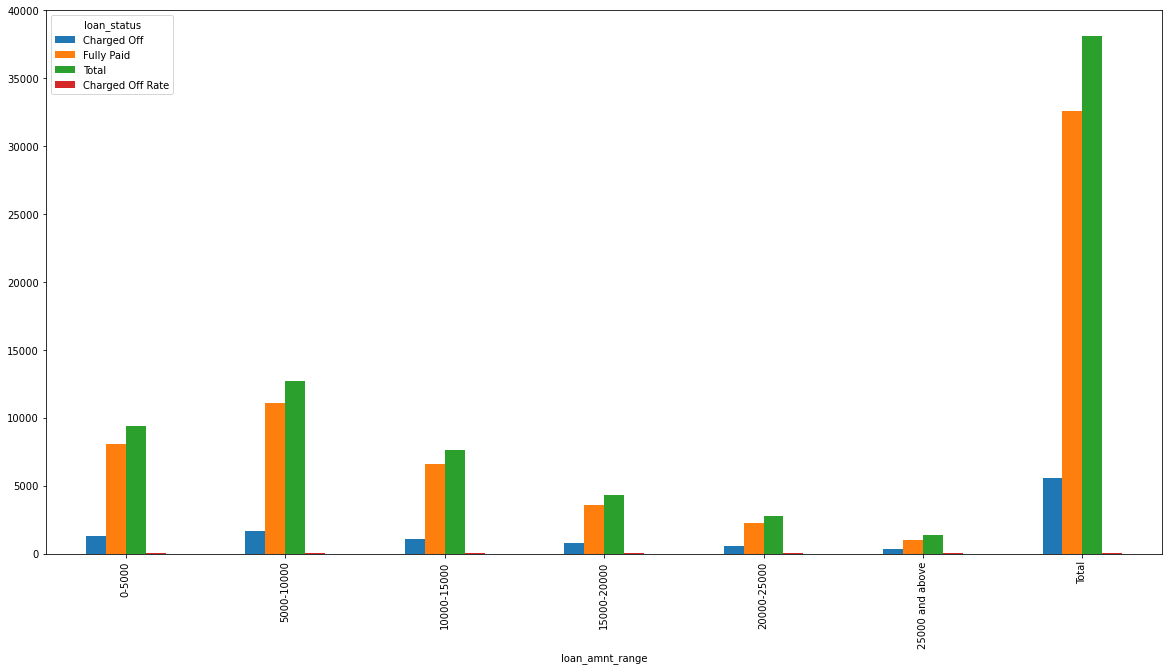

In [128]:
loan12['Charged Off Rate'].plot(kind="bar")
loan12.plot(kind="bar",figsize=[20,10])

### Loan Charged Off rate is highest for loan amt range "25000 & above" followed by 20,000-25,000 & then by 15,000-20,000 & then 0-5,000.
### It seems, generally, higher the Loan Amt, then higher are the chances of being charged off. However, same is not true for loan amt below 5,000

## j. Annual Income Range

In [129]:
loan.annual_inc.max()#checking maximum limit for bins

234996.0

In [130]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000]
slot = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-120000',
       '120000-140000', '140000-160000', '160000-180000', '180000-200000', '200000-220000',
       '220000-240000']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

In [131]:
loan13 = loan.pivot_table(values = 'loan_amnt',
                      index = 'annual_inc_range',
                      columns = 'loan_status',
                      aggfunc = 'count',
                      fill_value = 0,   
                      margins = True,
                      margins_name = 'Total')


loan13['Charged Off Rate'] = 100*(round((loan13['Charged Off']/loan13['Total']), 6))

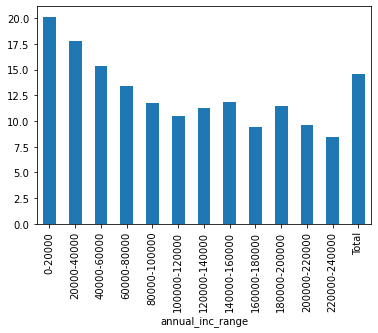

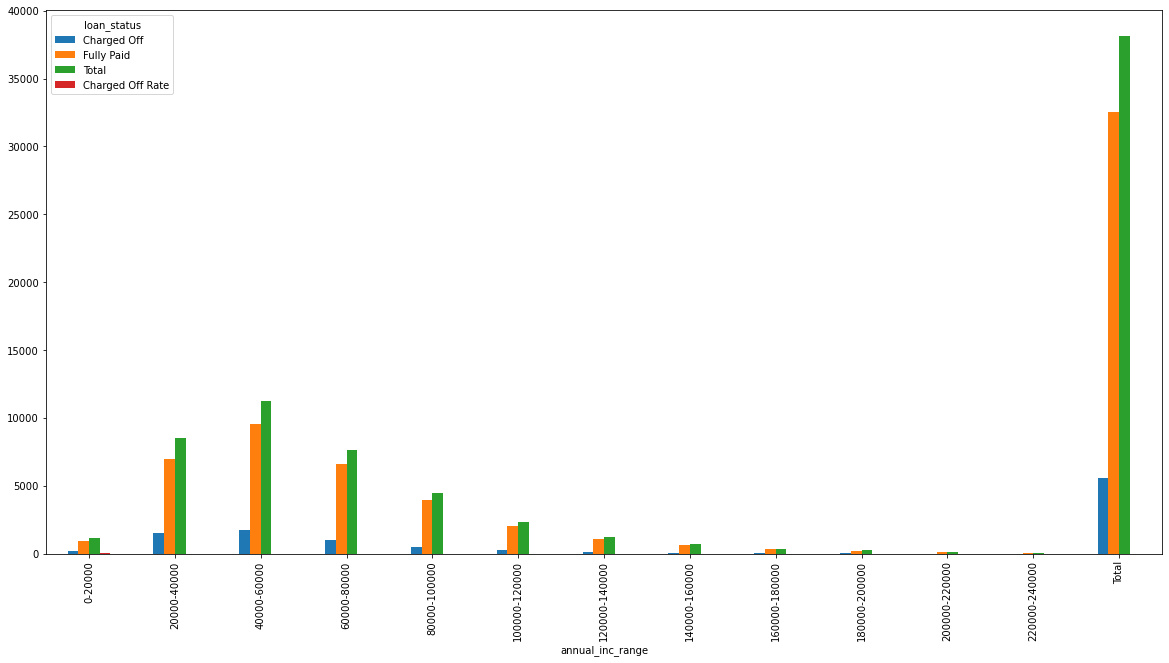

In [132]:
loan13['Charged Off Rate'].plot(kind="bar")
loan13.plot(kind="bar",figsize=[20,10])

### It appears that, upto Annual Income range of 1,00,000 --> lesser the annual income - higher the rate of charged off loans.
### If Annual Income range is between 1,00,000 - 2,00,000 then there is no specific trend.
### Again beyond Annual Income range of 2,00,000 --> lesser the annual income - higher the rate of charged off loans.

## k. Interest Rate Range

In [133]:
loan.int_rate.max()#checking maximum limit for bins

24.4

In [134]:
bins = [5, 10, 15, 20, 25]
slot = ['5-10', '10-15', '15-20', '20-25']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

In [135]:
loan14= loan.pivot_table(values = 'loan_amnt',
                      index = 'int_rate_range',
                      columns = 'loan_status',
                      aggfunc = 'count',
                      fill_value = 0,   
                      margins = True,
                      margins_name = 'Total')


loan14['Charged Off Rate'] = 100*(round((loan14['Charged Off']/loan14['Total']), 6))

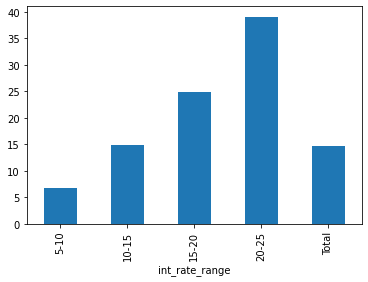

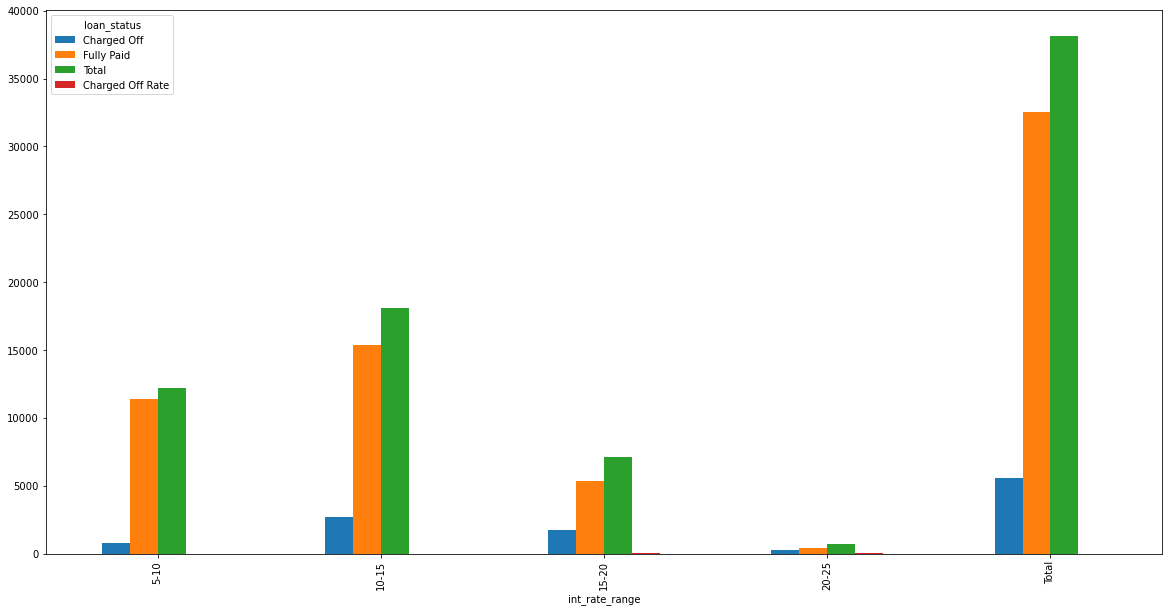

In [136]:
loan14['Charged Off Rate'].plot(kind="bar")
loan14.plot(kind="bar",figsize=[20,10])

### As interest rate increases --> Charged Off Rate also goes on increasing i.e. loans become riskier. Or, alternatively, riskier loans are always offered at higher roi

## l. Installment Amount Range

In [137]:
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]

slot = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400']

loan['installment_range'] = pd.cut(loan.installment, bins, labels = slot)

In [138]:
loan15 = loan.pivot_table(values = 'loan_amnt',
                      index = 'installment_range',
                      columns = 'loan_status',
                      aggfunc = 'count',
                      fill_value = 0,   
                      margins = True,
                      margins_name = 'Total')


loan15['Charged Off Rate'] = 100*(round((loan15['Charged Off']/loan15['Total']), 6))

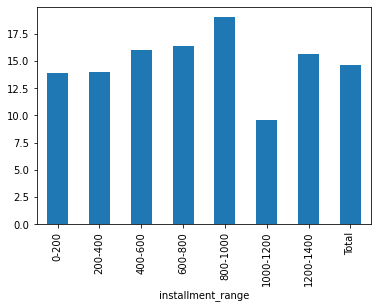

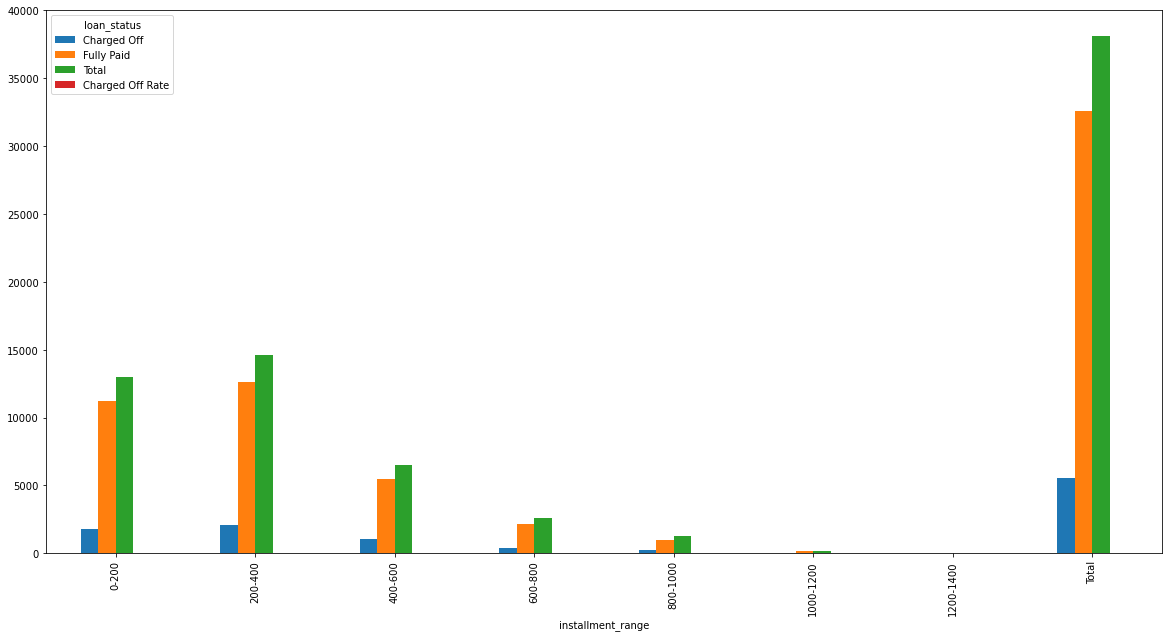

In [139]:
loan15['Charged Off Rate'].plot(kind="bar")
loan15.plot(kind="bar",figsize=[20,10])

### Even though, it is not a strong one, there seems to be a trend that as the installment amount increases, loan charged off rate goes on increasing

## m. Debt-to-Income Ratio

In [140]:
loan.dti.max()

29.99

In [141]:
bins = [0, 5, 10, 15, 20, 25, 30]

slot = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']

loan['dti_range'] = pd.cut(loan.dti, bins, labels = slot)

In [142]:
loan16 = loan.pivot_table(values = 'loan_amnt',
                      index = 'dti_range',
                      columns = 'loan_status',
                      aggfunc = 'count',
                      fill_value = 0,   
                      margins = True,
                      margins_name = 'Total')


loan16['Charged Off Rate'] = 100*(round((loan16['Charged Off']/loan16['Total']), 6))

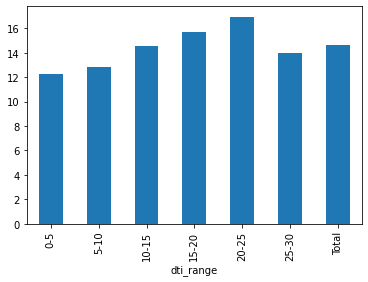

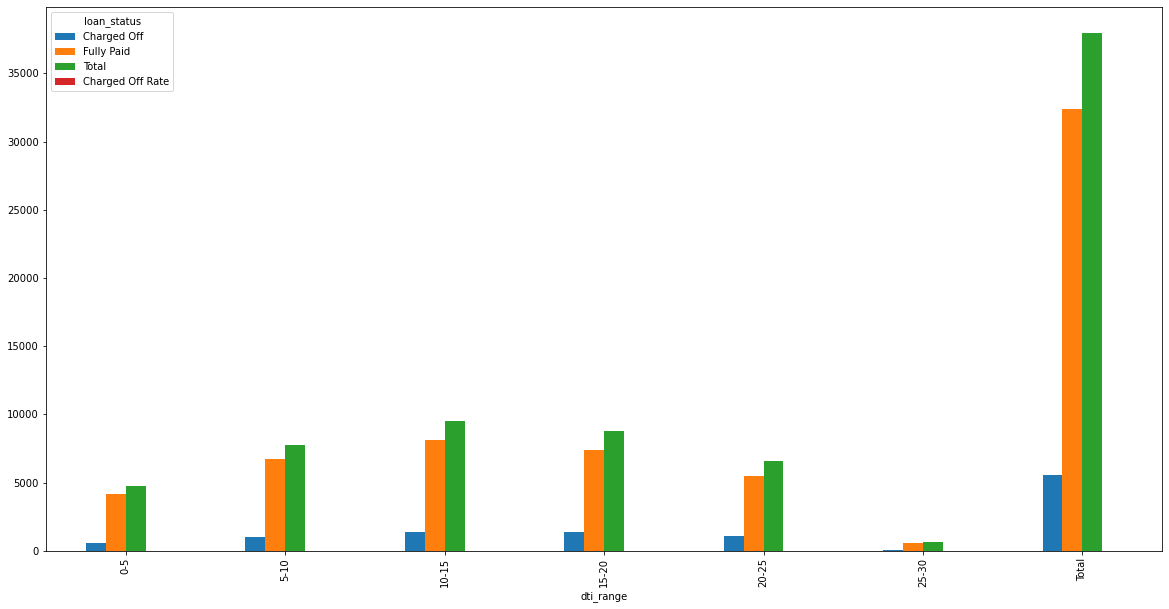

In [143]:
loan16['Charged Off Rate'].plot(kind="bar")
loan16.plot(kind="bar",figsize=[20,10])

### There seems to be a trend that as the Debt-to-Income ratio increases, loan charged off rate goes on increasing. Only exception is DTI range of 25-30 

In [144]:
charged_off_loan = loan[loan.loan_status == 'Charged Off'].corr()
charged_off_loan.dropna(axis = 1, how = 'all', inplace = True)
charged_off_loan

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies
loan_amnt,1.0000,0.9793,0.9072,0.3492,0.9260,0.1607,0.4531,0.0682,-0.0254
funded_amnt,0.9793,1.0000,0.9271,0.3522,0.9538,0.1649,0.4448,0.0650,-0.0301
funded_amnt_inv,0.9072,0.9271,1.0000,0.3676,0.8580,0.1747,0.4050,0.0763,-0.0332
int_rate,0.3492,0.3522,0.3676,1.0000,0.3260,0.0172,0.1656,0.0418,0.0764
installment,0.9260,0.9538,0.8580,0.3260,1.0000,0.1329,0.4516,0.0474,-0.0219
emp_length,0.1607,0.1649,0.1747,0.0172,0.1329,1.0000,0.1424,0.0593,0.0647
annual_inc,0.4531,0.4448,0.4050,0.1656,0.4516,0.1424,1.0000,-0.0559,0.0088
dti,0.0682,0.0650,0.0763,0.0418,0.0474,0.0593,-0.0559,1.0000,0.0180
pub_rec_bankruptcies,-0.0254,-0.0301,-0.0332,0.0764,-0.0219,0.0647,0.0088,0.0180,1.0000
num_loan_status,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [145]:
charged_off_loan.dropna(axis = 0, how = 'all', inplace = True)
charged_off_loan

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies
loan_amnt,1.0000,0.9793,0.9072,0.3492,0.9260,0.1607,0.4531,0.0682,-0.0254
funded_amnt,0.9793,1.0000,0.9271,0.3522,0.9538,0.1649,0.4448,0.0650,-0.0301
funded_amnt_inv,0.9072,0.9271,1.0000,0.3676,0.8580,0.1747,0.4050,0.0763,-0.0332
int_rate,0.3492,0.3522,0.3676,1.0000,0.3260,0.0172,0.1656,0.0418,0.0764
installment,0.9260,0.9538,0.8580,0.3260,1.0000,0.1329,0.4516,0.0474,-0.0219
emp_length,0.1607,0.1649,0.1747,0.0172,0.1329,1.0000,0.1424,0.0593,0.0647
annual_inc,0.4531,0.4448,0.4050,0.1656,0.4516,0.1424,1.0000,-0.0559,0.0088
dti,0.0682,0.0650,0.0763,0.0418,0.0474,0.0593,-0.0559,1.0000,0.0180
pub_rec_bankruptcies,-0.0254,-0.0301,-0.0332,0.0764,-0.0219,0.0647,0.0088,0.0180,1.0000


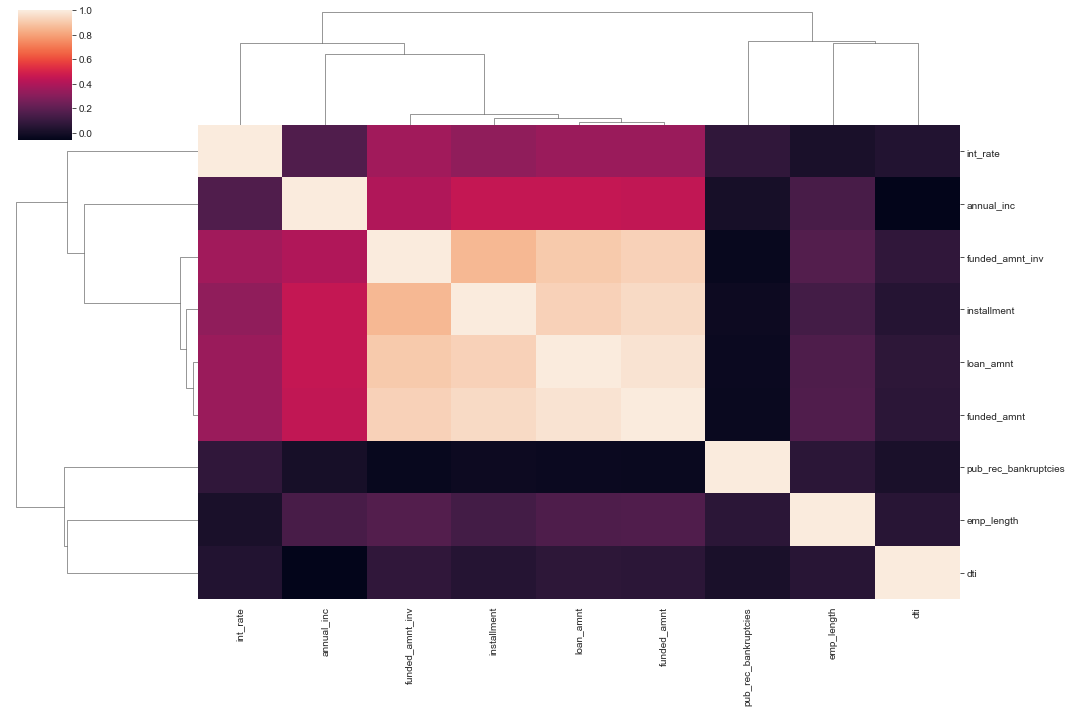

In [147]:
sns.set_style("whitegrid")
sns.clustermap(charged_off_loan, figsize=[15,10])

###  From the above Correlation metric, we can infer:

1. installment, funded_amnt, loan_amnt and funded_amnt_inv are highly correlated (positive) to each other. They form a cluster.

2. int_rate_percent & annual_income is positively correlated to some extent (around 0.5) to loan amnt, installment.

## Conclusions & Recommendations :

#### Major variables to consider for loan prediction:

1. Loan Purpose 
2. Address State
3. Loan Term
4. Internal Grade classification of Loan
5. Employment Length
6. Interest Rate
7. Loan Amount
        
### Conclusions Summary -
1. Customers who do not mention their home ownership status properly (home owneship status mentioned as "Others") while applying for loan have more likely to default
2. Loans applied for Small Business, Renewable Energy & Education are most likely to default
3. Loan applications from State NE have a high tendency to default
4. Higher the Loan Tenure, higher are the chances of default
5. As we move from Grade A to Grade G, loans become riskier and riskier and there are significantly high chances of default in Grade G loans
6. Applicants who are unemployed are most prone to commit a default. Further, applicants who have employment experience of more than 10 years are also more likely to default. This may be happening because such applicants may be closer to retirement.
7. Higher the loan amount --> higher is the risk of applicants committing a default
8. lesser the annual income - higher the rate of default. However, this trend is a little weak. As such, this may not always be true. 
9. There is a strong trend that higher the interest rate --> higher is the likelihood of default. Especially, loans with 20% plus interest rates are significantly prone to default
10. higher the installment amount - higher the rate of default. However, this trend is a little weak. As such, this may not always be true.
11. As Debt-to-Income ratio goes on increasing the likelihood of default also goes on increasing. However, this trend is also little weak

## Lending Club should be extra vigilent while processing & approving a loan application when any of above indicators are observed.